In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from akita_utils.format_io import h5_to_df
from scipy import stats

In [2]:
# python collect_jobs_and_clean.py /scratch2/smaruj/shifted_permutation_m0_s+10000 -g -l -n

In [3]:
import sys
sys.path.insert(0, "/home1/smaruj/akitaX1-analyses/utils/")
from utils import read_and_average_shuffling_exp

2024-01-23 10:45:13.420485: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-23 10:45:13.420543: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-23 10:45:13.421709: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-23 10:45:13.428105: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-23 10:45:14.676871: W tensorflow/compiler/tf2

In [4]:
# stat metric the analysis is based on
stat_of_analysis_interest = "SCD"

In [5]:
data_dir = "/project/fudenber_735/akitaX1_analyses_data/genomic_disruption_experiment/shifted_permutations"

In [6]:
df = read_and_average_shuffling_exp(data_dir, stat_to_average=stat_of_analysis_interest)

## Correlation between +10kb shift and wt

Text(0, 0.5, 'ave SCD, shifted by +10kb')

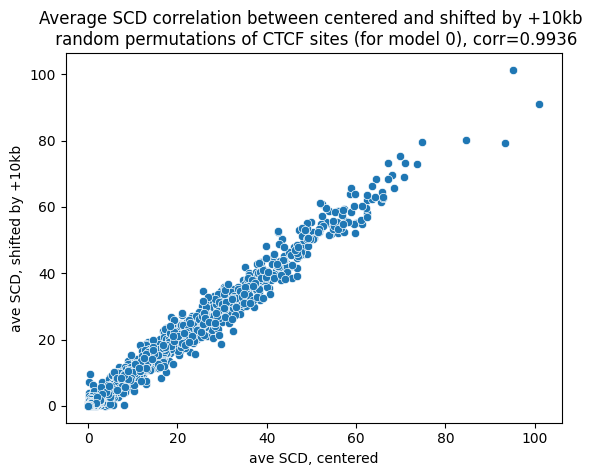

In [7]:
sn.scatterplot(x=df[f"{stat_of_analysis_interest}_no"], y=df[f"{stat_of_analysis_interest}_p10k"])
perm_corr = round(stats.pearsonr(df[f"{stat_of_analysis_interest}_no"], df[f"{stat_of_analysis_interest}_p10k"]).statistic, 4)
plt.title(f"Average {stat_of_analysis_interest} correlation between centered and shifted by +10kb \n random permutations of CTCF sites (for model 0), corr={perm_corr}")
plt.xlabel(f"ave {stat_of_analysis_interest}, centered")
plt.ylabel(f"ave {stat_of_analysis_interest}, shifted by +10kb")

## Correlations between all shifts and no shift

Text(0.5, 0.98, 'Correlations between SCD scores depending on shift')

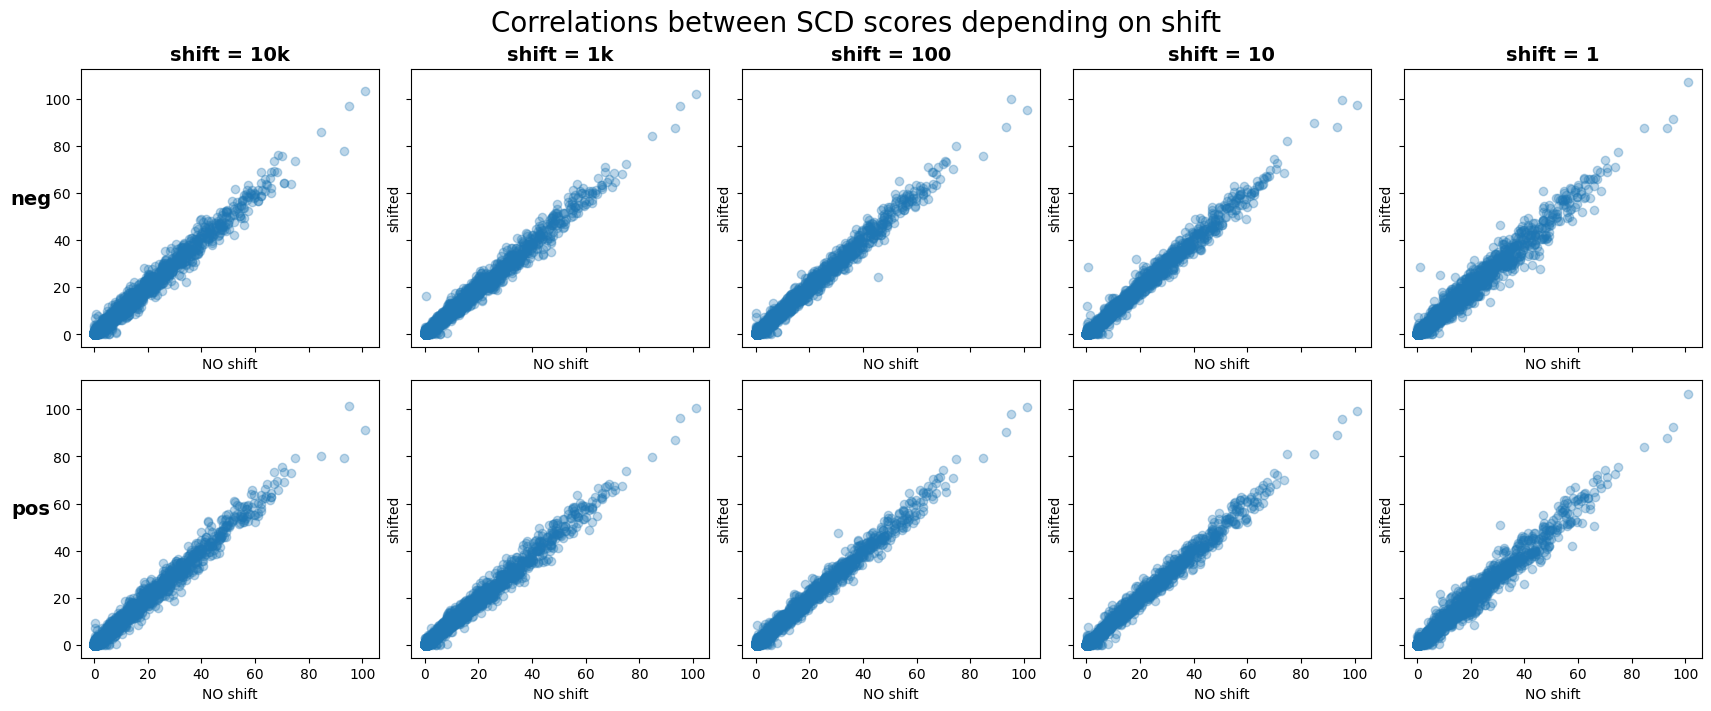

In [8]:
shifts = ["10k", "1k", "100", "10", "1"]
shifts_corr_summary = np.zeros((2, 5))

fig, axs = plt.subplots(2, 5, figsize=(17, 7), sharex=True, sharey=True, layout="constrained")

wt = np.array(df["SCD_no"])

for shift_index in range(len(shifts)):
    
    shift = shifts[shift_index]
    
    neg_shift = np.array(df[f"{stat_of_analysis_interest}_n{shift}"])
    pos_shift = np.array(df[f"{stat_of_analysis_interest}_p{shift}"])
    
    shifts_corr_summary[0, shift_index] = stats.pearsonr(wt, neg_shift).statistic
    shifts_corr_summary[1, shift_index] = stats.pearsonr(wt, pos_shift).statistic
        
    axs[0, shift_index].scatter(x=wt, y=neg_shift, alpha=0.3)
    axs[1, shift_index].scatter(x=wt, y=pos_shift, alpha=0.3)
    
    axs[0, shift_index].set_xlabel("NO shift")
    axs[0, shift_index].set_ylabel("shifted")
    
    axs[1, shift_index].set_xlabel("NO shift")
    axs[1, shift_index].set_ylabel("shifted")
    
col_names = [f"shift = {i}" for i in shifts]

for ax, col in zip(axs[0], col_names):
    ax.set_title(col, size=14, fontdict=dict(weight="bold"))
    
row_names = ["neg", "pos"]
    
for ax, row in zip(
    axs[:, 0],
    row_names,
):
    ax.set_ylabel(row, rotation=0, fontsize=14, labelpad=10, fontdict=dict(weight="bold"))
    
fig.suptitle(f"Correlations between {stat_of_analysis_interest} scores depending on shift", fontsize=20)

In [9]:
shifts_corr_summary

array([[0.99337917, 0.99418611, 0.99494329, 0.99471338, 0.98940903],
       [0.99359508, 0.9941592 , 0.99510044, 0.99561152, 0.99047875]])